In [1]:
import os
import pandas as pd
import sqlite3

In [2]:
from sqlalchemy import create_engine

**DATA IMPORTING**

In [3]:
engine=create_engine('sqlite:///inventory.db')

In [4]:
path=os.getcwd()
path

'c:\\8th Semester ECE\\Udemy Data Analytics course\\Python'

In [5]:
for file in os.listdir(path):
    if '.csv' in file:
        df=pd.read_csv(path+'\\'+file)
        print(df.shape)

(206529, 9)
(224489, 9)
(2372474, 16)
(12261, 9)
(12825363, 14)
(5543, 10)


In [4]:
def inject(df,tablename,engine):
    df.to_sql(tablename,con=engine,if_exists='replace',index=False)

In [7]:
for file in os.listdir(path):
    if '.csv' in file:
        df=pd.read_csv(path+'\\'+file)
        inject(df,file[:-4],engine)

**======================================================IMPORT COMPLETE=====================================================**

**Exploratory Data Analysis OF THE DATA**

To understand the dataset and to explore how the data is present in dataset and to know whether we have to create aggregated tables which can help us with
1. Product Price Optimization
2. Vendor selection for profitability.

In [5]:
conn=sqlite3.connect('inventory.db')                                  ## Creating Database connection

In [6]:
tables=pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",conn)
print(tables)

                   name
0       begin_inventory
1         end_inventory
2             purchases
3       purchase_prices
4                 sales
5        vendor_invoice
6  vendor_sales_summary


In [5]:
for table in tables['name']:
    print('-'*50,f"{table}",'-'*50)
    print('Count of Records:',pd.read_sql(f"SELECT COUNT(*) AS Count FROM {table}",conn)['Count'].values[0])
    display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5",conn))

-------------------------------------------------- begin_inventory --------------------------------------------------
Count of Records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of Records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of Records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of Records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
Count of Records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of Records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [7]:
purchases=pd.read_sql("SELECT * FROM purchases WHERE VendorNumber=4466",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [8]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [9]:
purchase_prices=pd.read_sql("SELECT * FROM purchase_prices WHERE VendorNumber=4466",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [10]:
vendor_invoice=pd.read_sql("SELECT * FROM vendor_invoice WHERE VendorNumber=4466",conn)
vendor_invoice.head(10)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [11]:
vendor_invoice["PONumber"].nunique() 

55

PONumber(Purchase Order Number) is unique for this table.

In [12]:
sales=pd.read_sql("SELECT * FROM sales WHERE VendorNo=4466",conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [13]:
sales.groupby('Brand')[['SalesQuantity',	'SalesDollars',	'SalesPrice']].sum()


,SalesQuantity,SalesDollars,SalesPrice
Brand,,,
3140,3890,50531.10,30071.85
5215,4651,60416.49,41542.02
5255,6096,79187.04,51180.60


In [14]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


Brands 5215 and 5255 made good profits, while 3140 incurred loss.

**INSIGHTS**

* The purchases table contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.
* The purchase price column is derived from the purchase_prices table, which provides product-wise actual and purchase prices. The combination of vendor and brand is unique in this table.
* The vendor_invoice table aggregates data from the purchases table, summarizing quantity and dollar amounts, along with an additional column for freight.
This table maintains uniqueness based on vendor and PO number.
* The sales table captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.

As the data that we need for analysis is distributed in different tables, we need to create a summary table containing:
* purchase transactions made by vendors
* sales transaction data
* freight costs for each vendor
* actual product prices from vendors

In [15]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [16]:
freight=pd.read_sql_query("SELECT VendorNumber,SUM(Freight) AS FreightCost FROM vendor_invoice GROUP BY VendorNumber",conn)
freight

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [17]:
print(purchase_prices.columns)
print(purchases.columns)

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')
Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')


In [18]:
purchase_summary=pd.read_sql_query("""SELECT 
                                   p.VendorNumber,
                                   p.VendorName,
                                   p.Brand,
                                   p.Description,
                                   p.PurchasePrice,
                                   pp.Volume,
                                   pp.Price AS ActualPrice, 
                                   SUM(p.Quantity) AS TotalQuantity,
                                   SUM(p.Dollars) AS TotalPurchaseDollars FROM purchases p
                                   JOIN purchase_prices pp
                                   ON p.Brand = pp.Brand
                                   WHERE p.PurchasePrice > 0
                                   GROUP BY p.VendorNumber, p.VendorName, p.Brand
                                   ORDER BY TotalPurchaseDollars""",conn)
purchase_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750,28.99,164038,3804041.22


In [19]:
pd.read_sql_query("""SELECT
VendorNo,
Brand,
SUM(SalesDollars) as TotalSalesDollars,
SUM(SalesPrice) as TotalSalesPrice,
SUM(SalesQuantity) as TotalSalesQuanity,
SUM(ExciseTax) as TotalExciseTax
FROM sales
GROUP BY VendorNo, Brand""",conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuanity,TotalExciseTax
0,2,90085,665.82,295.92,18,2.00
1,2,90609,599.76,449.82,24,0.52
2,60,771,704.53,494.67,47,37.01
3,60,3979,66871.69,41682.51,3931,7224.06
4,105,2529,359.88,59.98,12,9.44
...,...,...,...,...,...,...
11267,173357,2804,6298.60,3194.29,140,110.33
11268,173357,3666,8996.40,4873.05,360,141.19
11269,173357,3848,185.94,92.97,6,4.71
11270,173357,3909,24540.18,14469.21,982,773.87


import time
start=time.time()
final_table = pd.read_sql_query("""SELECT
pp.VendorNumber,
pp.Brand,
pp.Price AS ActualPrice,
pp.PurchasePrice,
SUM(s.SalesQuantity) AS TotalSalesQuantity,
SUM(s.SalesDollars) AS TotalSalesDollars,
SUM(s.SalesPrice) AS TotalSalesPrice,
SUM(s.ExciseTax) AS TotalExciseTax,
SUM(vi.Quantity) AS TotalPurchaseQuantity,
SUM(vi.Dollars) AS TotalPurchaseDollars,
SUM(vi.Freight) AS TotalFreightCost
FROM purchase_prices pp
JOIN sales s
ON pp.VendorNumber = s.VendorNo
AND pp.Brand = s.Brand
JOIN vendor_invoice vi
ON pp.VendorNumber = vi.VendorNumber
GROUP BY pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice""",conn)
end=time.time()


This code takes too long to run and runs out of memory limit. We need to optimise the code as follows..

In [6]:
vendor_sales_summary=pd.read_sql_query("""WITH Freight AS
                                       (SELECT VendorNumber,SUM(Freight) AS FreightCost FROM vendor_invoice GROUP BY VendorNumber),
                                       PurchaseSummary AS 
                                       (SELECT 
                                   p.VendorNumber,
                                   p.VendorName,
                                   p.Brand,
                                   p.Description,
                                   p.PurchasePrice,
                                   pp.Volume,
                                   pp.Price AS ActualPrice, 
                                   SUM(p.Quantity) AS TotalPurchaseQuantity,
                                   SUM(p.Dollars) AS TotalPurchaseDollars FROM purchases p
                                   JOIN purchase_prices pp
                                   ON p.Brand = pp.Brand
                                   WHERE p.PurchasePrice > 0
                                   GROUP BY p.VendorNumber, p.VendorName, p.Brand
                                   ORDER BY TotalPurchaseDollars),
                                    SalesSummary AS
                                       (SELECT
VendorNo,
Brand,
SUM(SalesDollars) as TotalSalesDollars,
SUM(SalesPrice) as TotalSalesPrice,
SUM(SalesQuantity) as TotalSalesQuantity,
SUM(ExciseTax) as TotalExciseTax
FROM sales
GROUP BY VendorNo, Brand)
 
SELECT
ps.VendorNumber,
ps.VendorName,
ps.Brand,
ps.Description,
ps.PurchasePrice,
ps.ActualPrice,
ps.Volume,
ps.TotalPurchaseQuantity,
ps.TotalPurchaseDollars,
ss.TotalSalesQuantity,
ss.TotalSalesDollars,
ss.TotalSalesPrice,
ss.TotalExciseTax,
fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss
ON ps.VendorNumber = ss.VendorNo
AND ps.Brand = ss.Brand
LEFT JOIN Freight fs
ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC""",conn)

In [6]:
vendor_sales_summary=pd.read_sql("""SELECT * FROM vendor_sales_summary""",conn)
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,0.834483,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,0.964362,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,0.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,0.989740,72.000000,97.469388


This query generates a vendor-wise sales and purchase summary, which is valuable for:
Performance Optimization:
* The query involves heavy joins and aggregations on large datasets like sales and purchases.
* Storing the pre-aggregated results avoids repeated expensive computations.
* Helps in analyzing sales, purchases, and pricing for different vendors and brands.
* Future Benefits of Storing this data for faster Dashboarding & Reporting.
* Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.

Before we proceed to use this table, we should check whether it is clean or not, whether it has missing values etc.

In [ ]:
inject(vendor_sales_summary,"vendor_sales_summary",engine)

In [7]:
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                    object
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [8]:
vendor_sales_summary.isnull().sum()

VendorNumber               0
VendorName                 0
Brand                      0
Description                0
PurchasePrice              0
ActualPrice                0
Volume                     0
TotalPurchaseQuantity      0
TotalPurchaseDollars       0
TotalSalesQuantity       178
TotalSalesDollars        178
TotalSalesPrice          178
TotalExciseTax           178
FreightCost                0
dtype: int64

In [ ]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

There are 3 inconsistencies in this table:
* Volume should be an integer, but it is an object.
* Missing values in sales columns tell us that the vendor purchased some products, but didn't sell them.
* There are too many whitespaces in the VendorName column.

Let's remove these inconsistencies in the next 3 cells.

In [12]:
vendor_sales_summary['Volume']=vendor_sales_summary['Volume'].astype('float64')
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
GrossProfit              float64
ProfitMargin             float64
StockTurnover            float64
SalestoPurchaseRatio     float64
dtype: object

In [7]:
vendor_sales_summary.fillna(0,inplace=True)
vendor_sales_summary.isnull().sum()

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
ActualPrice              0
Volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalSalesQuantity       0
TotalSalesDollars        0
TotalSalesPrice          0
TotalExciseTax           0
FreightCost              0
GrossProfit              0
ProfitMargin             0
StockTurnover            0
SalestoPurchaseRatio     0
dtype: int64

In [14]:
vendor_sales_summary['VendorName']=vendor_sales_summary['VendorName'].str.strip()
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

**==============================================================================================================================================================================**

**We now create 4 KPIs whose definitions are given below, and add these columns to the table.**

* **Gross Profit**            : The profit/loss earned which is Sales price minus the Purchase Price.
* **Profit Margin**           : The profit percentage calculated by the Sales Price.
* **Stock Turnover**          : The ratio of number of products sold to that purchased.
* **Sales to Purchase Ratio** : The ratio of total Sales price to the total Purchase Price.

In [34]:
vendor_sales_summary['GrossProfit']=vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']
vendor_sales_summary['ProfitMargin']=vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars']
vendor_sales_summary['StockTurnover']=vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']
vendor_sales_summary['SalestoPurchaseRatio']=vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']

**================================================================================================================================================================================**

**EXPLORATORY DATA ANALYSIS(GRAPHS AND VISUALIZATIONS)**

* Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
* In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np

In [18]:
vendor_sales_summary.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


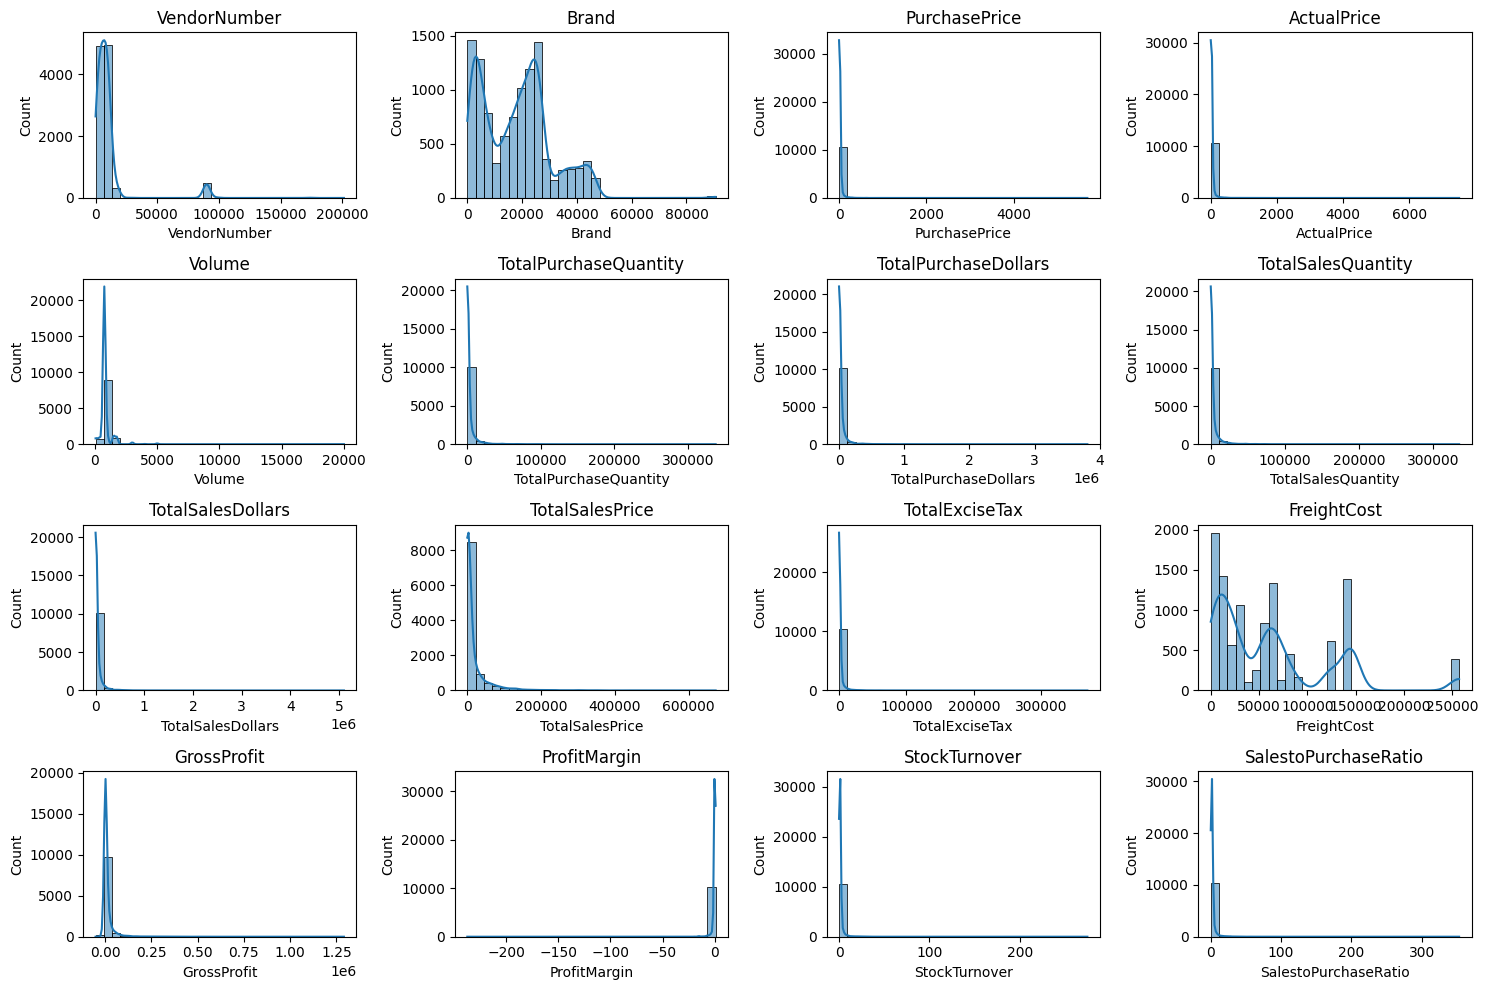

In [9]:
numeric=vendor_sales_summary.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric):
    plt.subplot(4,4,i+1)
    sns.histplot(vendor_sales_summary[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

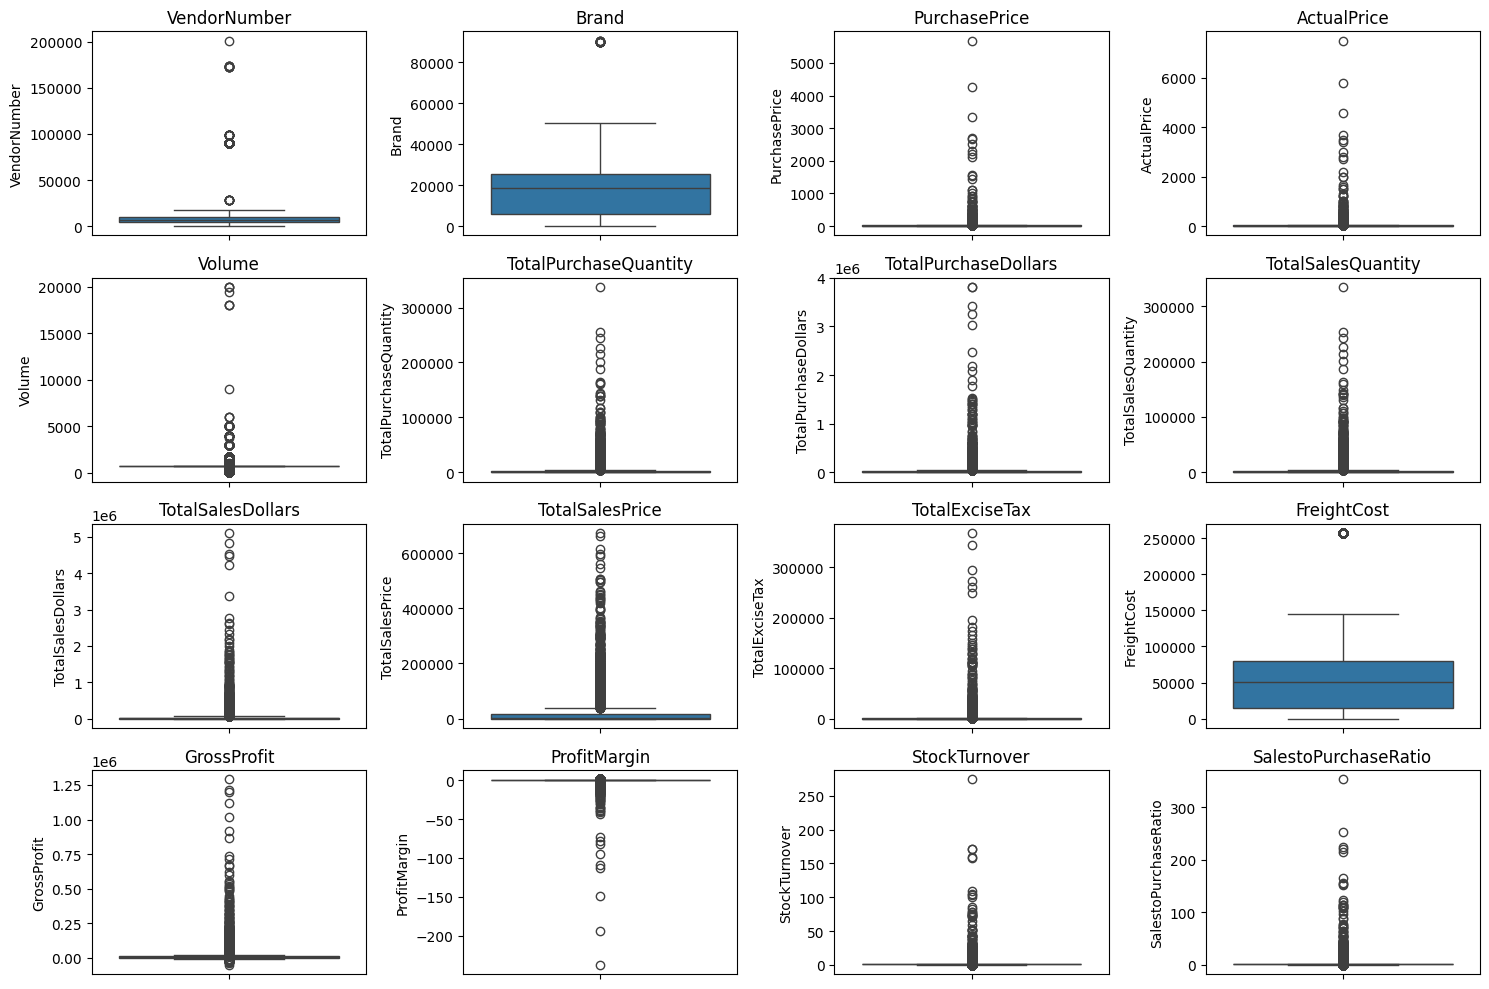

In [11]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric):
    plt.subplot(4,4,i+1)
    sns.boxplot(vendor_sales_summary[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights:
**Negative & Zero Values**:
* **Gross Profit**: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
* **Profit Margin**: Has a minimum of-00, which suggests cases where revenue is zero or even lower than costs.
* **Total Sales Quantity & Sales Dollars**: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations**:
* **Purchase & Actual Prices**: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
* **Freight Cost**: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* **Stock Turnover**: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [7]:
#Removing some inconsistencies
vendor_sales_summary=pd.read_sql_query("""SELECT * FROM vendor_sales_summary
                                       WHERE GrossProfit>0  
                                       AND ProfitMargin>0
                                       AND TotalSalesQuantity>0""",conn)
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,0.834483,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,0.964362,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,0.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,0.989740,72.000000,97.469388


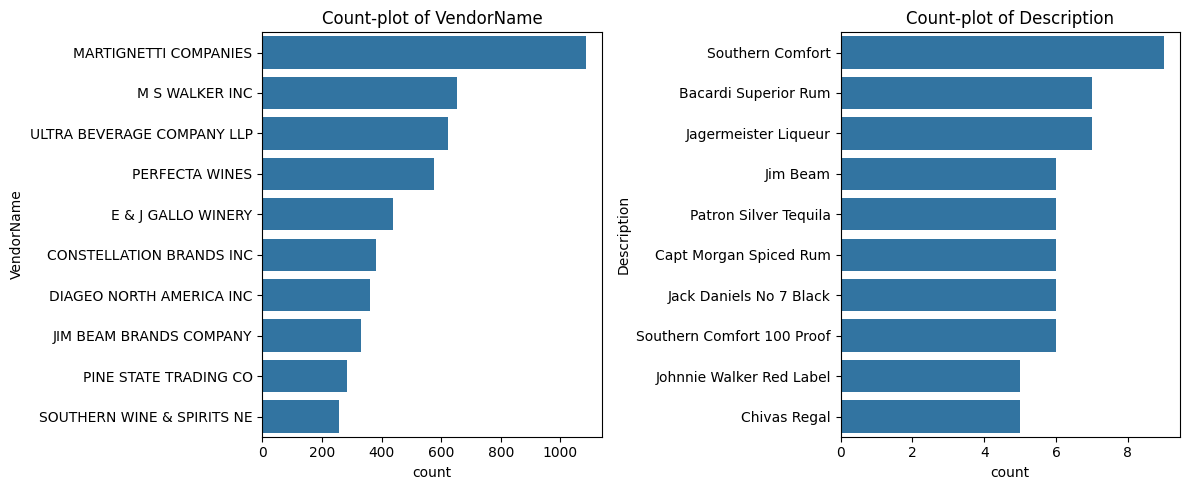

In [11]:
categorical=["VendorName","Description"]
plt.figure(figsize=(12,5))
for i, col in enumerate(categorical):
    plt.subplot(1,2,i+1)
    sns.countplot(y=vendor_sales_summary[col],order=vendor_sales_summary[col].value_counts().index[:10])  ##Top 10 categories
    plt.title(f"Count-plot of {col}")
plt.tight_layout()
plt.show()

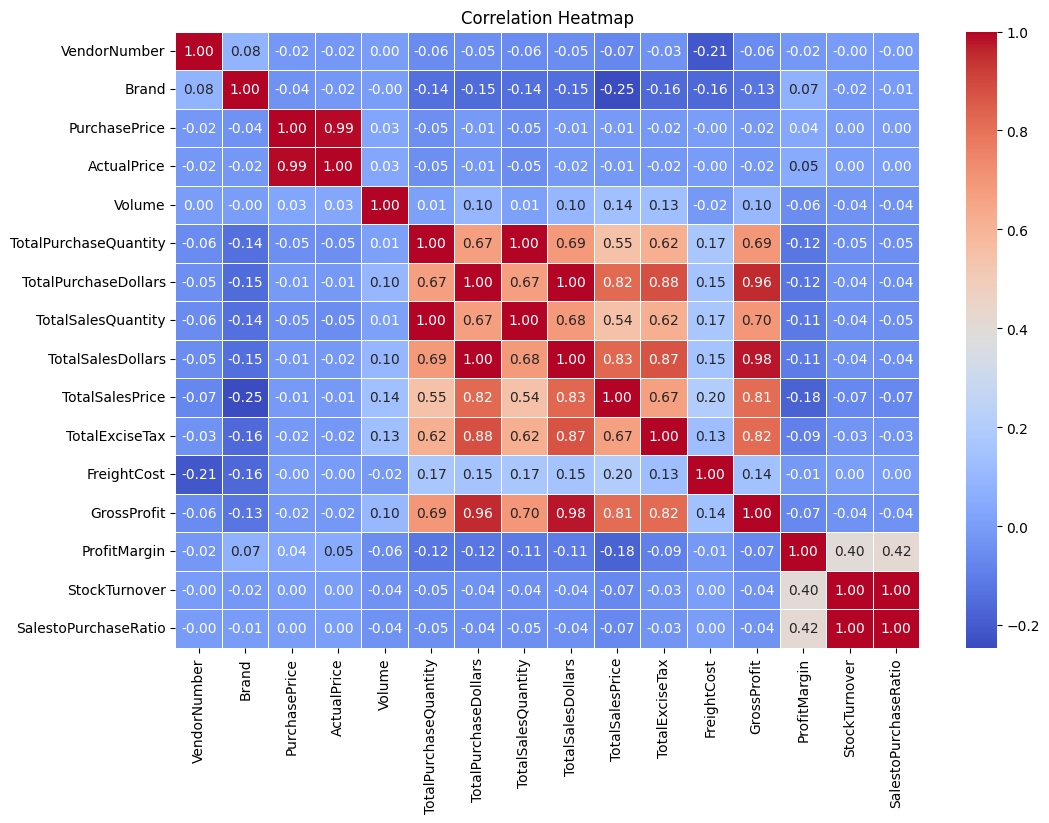

In [12]:
##Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix=vendor_sales_summary[numeric].corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Correlation Insights**
* PurchasePrice has weak correlations with TotalSales Dollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
* Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
* Stock Turnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

**=============================================================================================================================================================================**

### **DATA ANALYSIS**


**Identify Brands that need Promotional or Pricing Adjustments which exhibit lower Sales Performance but higher Profit Margins.**

In [13]:
brand_performance=vendor_sales_summary.groupby("Description").agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [14]:
low_Sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_profit_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)
print(f"{low_Sales_threshold} || {round(high_profit_margin_threshold,3)*100}%")

560.299 || 65.0%


In [15]:
target_Brands=brand_performance[(brand_performance['TotalSalesDollars']<=low_Sales_threshold) & (brand_performance['ProfitMargin']>=high_profit_margin_threshold)]
print("Brands with Low Sales but High Profit Margin:")
display(target_Brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,0.664665
2369,Debauchery Pnt Nr,11.58,0.659758
2070,Concannon Glen Ellen Wh Zin,15.95,0.834483
2188,Crown Royal Apple,27.86,0.898062
6237,Sauza Sprklg Wild Berry Marg,27.96,0.821531
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,0.767473
2271,Dad's Hat Rye Whiskey,538.89,0.818516
57,A Bichot Clos Marechaudes,539.94,0.677409
6245,Sbragia Home Ranch Merlot,549.75,0.664447


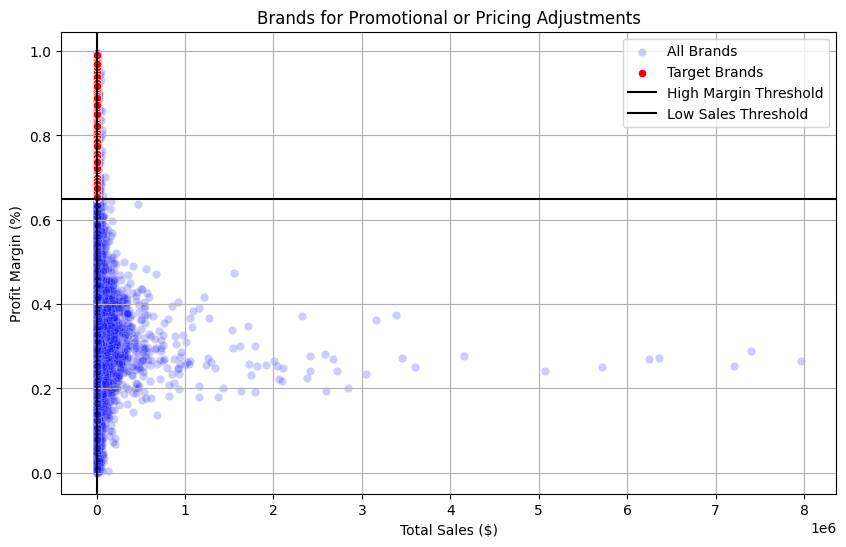

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_Brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")
plt.axhline(high_profit_margin_threshold, linestyle='-', color='black', label="High Margin Threshold")
plt.axvline(low_Sales_threshold, linestyle='-', color='black', label="Low Sales Threshold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Which Vendors and Brands demonstrate the highest Sales Performance?**

In [17]:
def format_dollars(value):
    if value>=1_000_000:
        return(f"{round(value/1_000_000,2)}M")
    elif value>=1_000:
        return(f"{round(value/1_000,2)}k")
    else:
        return str(round(value,2))

In [18]:
top_vendors=vendor_sales_summary.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands=vendor_sales_summary.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
display(top_vendors.apply(lambda x : format_dollars(x)))
display(top_brands.apply(lambda x : format_dollars(x)))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY             18.4M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP     16.5M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka       7.4M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                      3.6M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

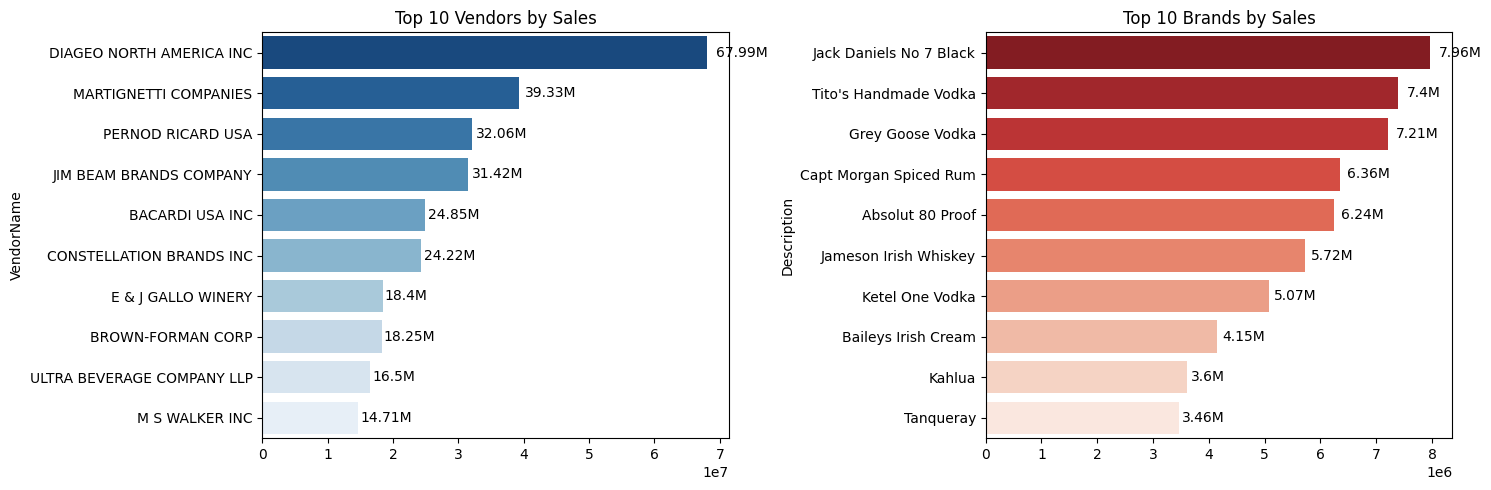

In [19]:
plt.figure(figsize=(15,5))
# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")
for bar in ax1.patches:
 ax1.text(bar.get_width() + (bar.get_width() * 0.02), bar.get_y() + bar.get_height() / 2, format_dollars(bar.get_width()), ha='left', va='center', fontsize=10, color='black')
#Plot for Top Brands
plt.subplot(1, 2, 2)
ax2=sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")
for bar in ax2.patches:
 ax2.text(bar.get_width() + (bar.get_width() * 0.02), bar.get_y() + bar.get_height() / 2, format_dollars(bar.get_width()),ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Which vendors contribute the most to total purchase value?**

In [20]:
vendor_performance=vendor_sales_summary.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'}
).reset_index()
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [21]:
vendor_performance['PurchaseContri%']=round((vendor_performance['TotalPurchaseDollars']*100)/vendor_performance['TotalPurchaseDollars'].sum(),2)
vendor_performance.sort_values('PurchaseContri%',ascending=False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContri%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
101,THE IMPORTED GRAPE LLC,12379.45,6324.20,18703.65,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
108,VINEDREA WINES LLC,4657.60,6728.00,11385.60,0.00
105,TY KU LLC,13068.46,8408.12,21476.58,0.00


In [22]:
#Display top vendors by purchase values
top_vendors=vendor_performance.sort_values('PurchaseContri%',ascending=False).head(10)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(lambda x : format_dollars(x))
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(lambda x : format_dollars(x))
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(lambda x : format_dollars(x))
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContri%
25,DIAGEO NORTH AMERICA INC,50.1M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.5M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.4M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.5M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [23]:
top_vendors['PurchaseContri%'].sum()

np.float64(65.69000000000001)

In [24]:
top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContri%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContri%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.1M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.5M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.4M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.5M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


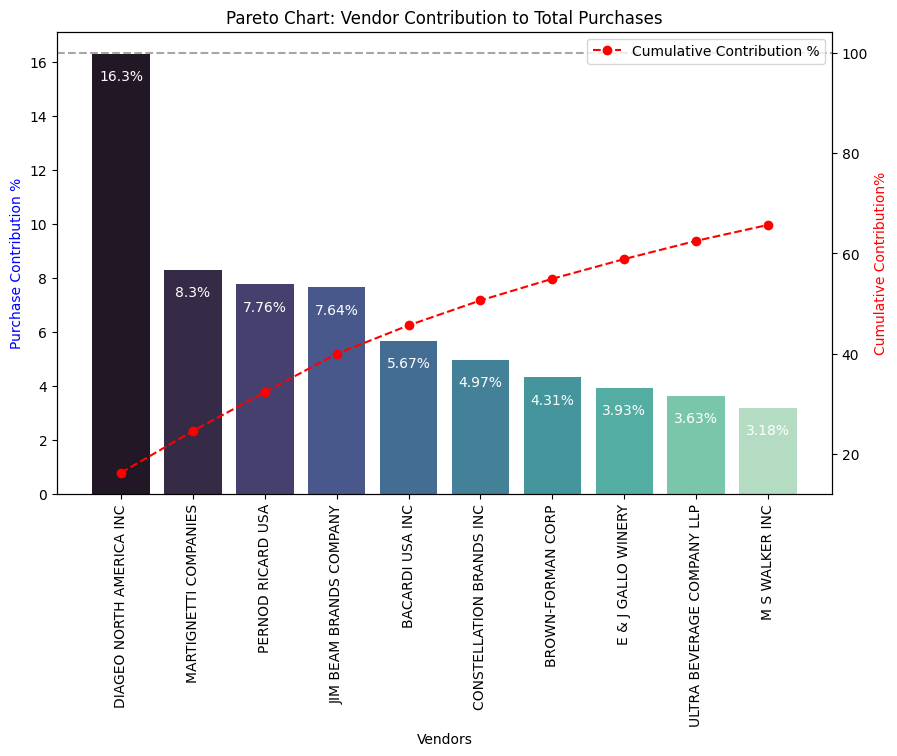

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 6))
# Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContri%'],
palette="mako", ax=ax1)
for i, value in enumerate (top_vendors ['PurchaseContri%']):
 ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')
# Line Plot for Cumulative Contribution%
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend (loc='upper right')
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**


**How much of total procurement is dependent on top vendors?**

In [26]:
print(f"Total purchase contribution of top 10 vendors is: {round(top_vendors['PurchaseContri%'].sum(),2)}%")

Total purchase contribution of top 10 vendors is: 65.69%


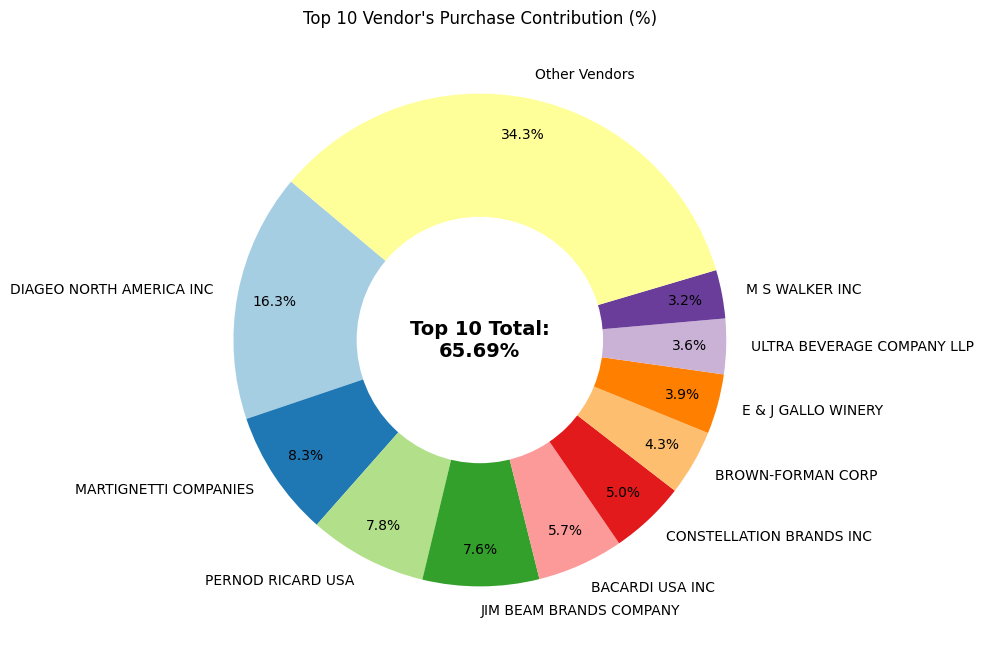

In [27]:
vendors=list(top_vendors['VendorName'].values)
purchase_contributions=list(top_vendors ['PurchaseContri%'].values)
total_contribution=sum(purchase_contributions)
remaining_contribution= 100-total_contribution
vendors.append("Other Vendors")

purchase_contributions.append(remaining_contribution)
fig, ax= plt.subplots(figsize=(8, 8))
wedges, texts, autotexts= ax.pie (purchase_contributions, labels=vendors, autopct='%1.1f%%',
startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)
#Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)
#Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**


**Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?**

In [28]:
vendor_sales_summary['UnitPrice']=vendor_sales_summary['TotalPurchaseDollars']/vendor_sales_summary['TotalPurchaseQuantity']

In [31]:
vendor_sales_summary['OrderSize']=pd.qcut(vendor_sales_summary['TotalPurchaseQuantity'],q=3, labels=["Small","Medium","Large"])

In [32]:
vendor_sales_summary.groupby('OrderSize')['UnitPrice'].mean()

OrderSize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: UnitPrice, dtype: float64

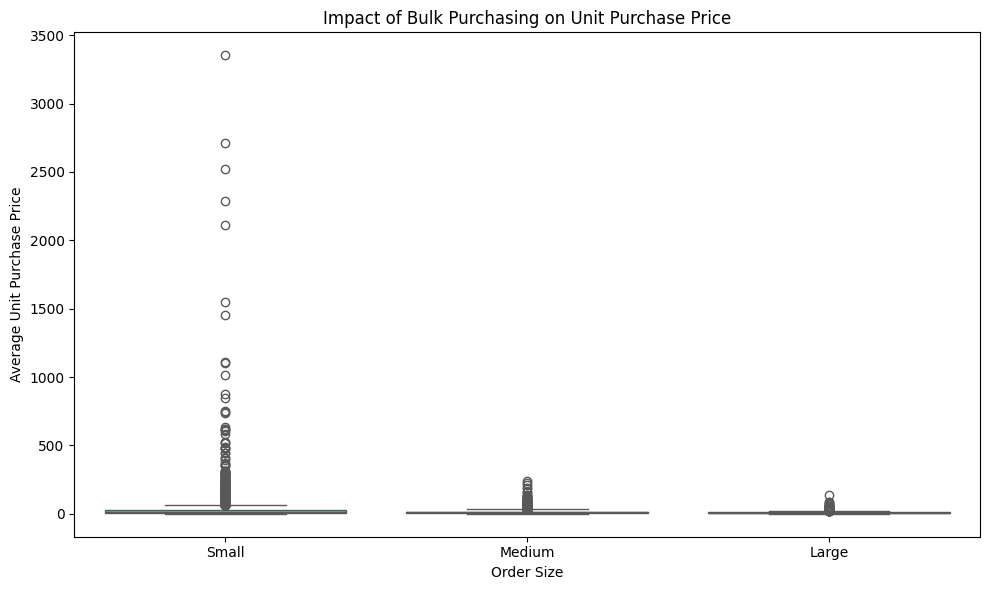

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=vendor_sales_summary,x='OrderSize',y='UnitPrice',palette='Set2')
plt.title("Impact of Bulk Purchasing on Unit Purchase Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.tight_layout()
plt.show()

* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large orders is substantial (-72% reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**


**Which vendors have low inventory turnover, indicating excess stock and slow-moving products?**

In [42]:
low_turnover=vendor_sales_summary[vendor_sales_summary['StockTurnover']<1].groupby('VendorName')['StockTurnover'].mean().sort_values(ascending=True).head(10)
low_turnover

VendorName
ALISA CARR BEVERAGES           0.615385
HIGHLAND WINE MERCHANTS LLC    0.708333
PARK STREET IMPORTS LLC        0.751306
Circa Wines                    0.755676
Dunn Wine Brokers              0.766022
CENTEUR IMPORTS LLC            0.773953
SMOKY QUARTZ DISTILLERY LLC    0.783835
TAMWORTH DISTILLING            0.797078
THE IMPORTED GRAPE LLC         0.807569
WALPOLE MTN VIEW WINERY        0.820548
Name: StockTurnover, dtype: float64

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**


**How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?**

In [43]:
vendor_sales_summary['UnsoldInventoryValue']=(vendor_sales_summary['TotalPurchaseQuantity']-vendor_sales_summary['TotalSalesQuantity'])*vendor_sales_summary['PurchasePrice']
print(f"Total Unsold Capital: {format_dollars(vendor_sales_summary['UnsoldInventoryValue'].sum())}")

Total Unsold Capital: 2.71M


In [44]:
inventory_value_per_vendor=vendor_sales_summary.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.6k


**-------------------------------------------------------------------------------------------------------------------------------------------------------------**


**What is 95% CI for profit margins of top and low performing vendors?**

In [51]:
top_threshold=vendor_sales_summary['TotalSalesDollars'].quantile(0.75)
low_threshold=vendor_sales_summary['TotalSalesDollars'].quantile(0.25)
top_vendors=vendor_sales_summary[vendor_sales_summary['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors=vendor_sales_summary[vendor_sales_summary['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()
top_vendors

0       0.252977
1       0.210628
2       0.246758
3       0.271399
4       0.284128
          ...   
3523    0.796848
3681    0.857821
4751    0.930859
4920    0.950125
5050    0.942719
Name: ProfitMargin, Length: 2141, dtype: float64

In [54]:
def confidence_interval(data, confidence=0.95):
 mean_val = np.mean(data)
 std_err = np.std(data, ddof=1) / np.sqrt(len(data))
 # Standard error
 t_critical=stats.t.ppf((1+ confidence) / 2, df=len(data) -1)
 margin_of_error = t_critical * std_err
 return mean_val, (mean_val-margin_of_error), (mean_val + margin_of_error)

Top Vendors 95% CI: (30.74%, 31.61%), Mean: 31.18%
Low Vendors 95% CI: (40.50%, 42.64%), Mean: 41.57%


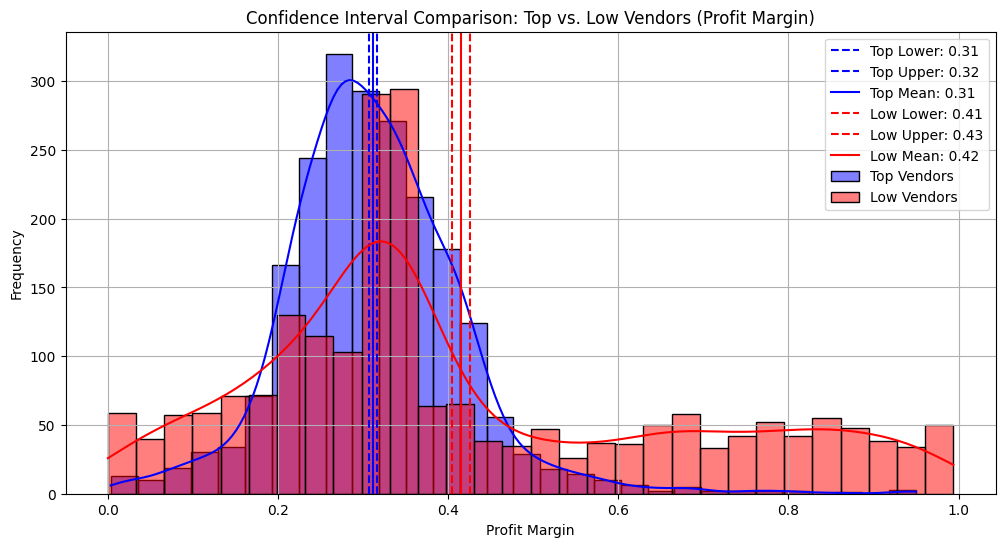

In [57]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)
print(f"Top Vendors 95% CI: ({100*top_lower:.2f}%, {100*top_upper:.2f}%), Mean: {100*top_mean:.2f}%")
print(f"Low Vendors 95% CI: ({100*low_lower:.2f}%, {100*low_upper:.2f}%), Mean: {100*low_mean:.2f}%")
plt.figure(figsize=(12, 6))
#Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")
# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")
# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

* The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
* For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
* For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**


**Is there a significant difference in profit margins between top and low performing vendors?**

Hypothesis:

Ho (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [59]:
top_threshold= vendor_sales_summary["TotalSalesDollars"].quantile(0.75)
low_threshold= vendor_sales_summary["TotalSalesDollars"].quantile(0.25)
top_vendors = vendor_sales_summary[vendor_sales_summary["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors= vendor_sales_summary[vendor_sales_summary["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()
#Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)
#Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
 print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
 print("Fail to Reject Ho: No significant difference in profit margins.")


T-Statistic: -17.6695, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.


**==============================================================================================================================================================================**

Saving the cleaned data as a csv file.

In [8]:
vendor_sales_summary.to_csv('Cleaned_Data.csv')

**==============================================================================================================================================================================**